Here are some recommended packages, not all are required and depends on your solution.

In [58]:
# imports
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
# allow plots to appear directly in the notebook
%matplotlib inline

## Questions

You are a consultant for a company that sells widgets.  They have historical data on their sales on their investments in advertising in various media outlets, including TV, radio, and newspapers.  On the basis of this data, how should they be spending their advertising money in the future?

Your analysis should answer the following questions:

Is there a relationship between ads and sales?

How strong is that relationship?

Which ad types contribute to sales?

What is the effect of each ad type of sales?

Given ad spending in a particular market, can sales be predicted?

      TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9


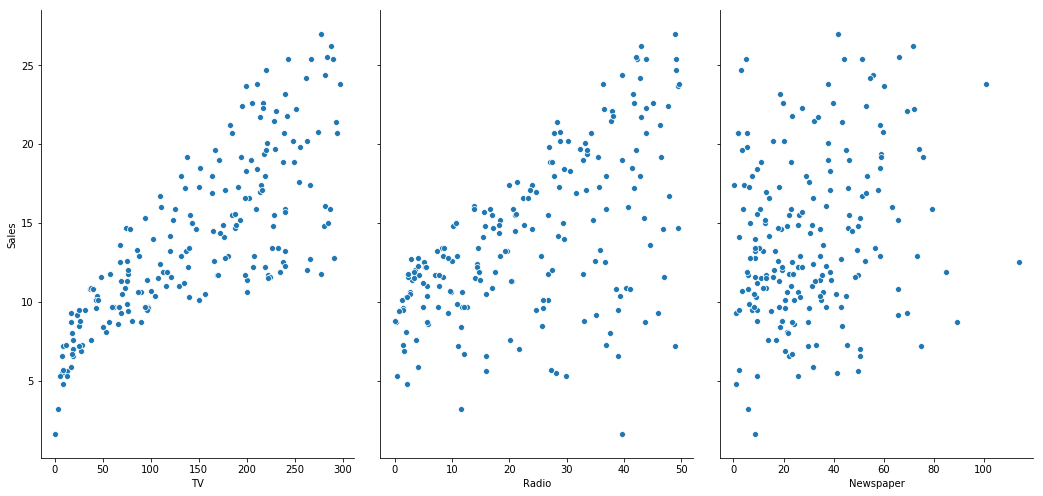

In [2]:
# read data into a DataFrame, this is money spent on different medias
data = pd.read_csv('https://raw.githubusercontent.com/lneisenman/isl/master/data/Advertising.csv', index_col=0)
print(data.head())
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=7, aspect=0.7)


In the lecture, we covered how to perform a linear regression model.  We did not however explore how "good" this model is.  The task below will have you identifying ways to evaluate a linear regression model.

Machine learning focuses on what the model predicts. If you would like to dive into the meaning of fit parameters within the model, other tools are available, including the Statsmodels Python package. Take some time to look at this [package](https://www.statsmodels.org/stable/regression.html) and also an [example of evaluating a linear regression](https://www.statsmodels.org/stable/examples/notebooks/generated/gls.html).

Similar to Scikit-learn, one can calculate the intercept and coefficient for a linear fit for a set of data.  

In [4]:
model = smf.ols(formula='Sales ~ TV', data=data).fit()
model.params

Intercept    7.032594
TV           0.047537
dtype: float64

A confidence interval can be used to describe a linear model.  How would you calculate the confidence interval of this model and what does this confidence interval mean?

In [6]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.47e-42
Time:                        14:56:32   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Other metrics that are used to describe the appropriateness of a model is a p-value.  How would you calculate the p-value and r-squared values of the model?  What do these values mean?

# P value is to show the significant of the data and r squared values mean the how well the model is represending the data

In [54]:
NH3 = pd.read_excel("NH3.xlsx")
H2S = pd.read_excel("H2S.xlsx")
group = pd.read_excel("group.xlsx")

NH3.index=NH3['Days']
NH3 = NH3.drop('Days', axis = 1)
NH3.columns = map(lambda x: int(x), NH3.columns)
NH3 = NH3.transpose()

H2S.index=H2S['Days']
H2S = H2S.drop('Days', axis = 1)
H2S.columns = map(lambda x: int(x), H2S.columns)
H2S = H2S.transpose()


NH3['Treatment'] = group['Treatment']
H2S['Treatment'] = group['Treatment']     

AverageNH3 = NH3.groupby(['Treatment']).mean()
AverageH2S = H2S.groupby(['Treatment']).mean()



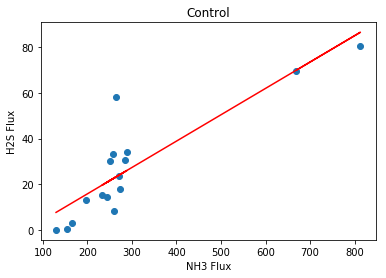

R squared value is 0.762
the coefficient: 0.115, and the intercept: -7.179


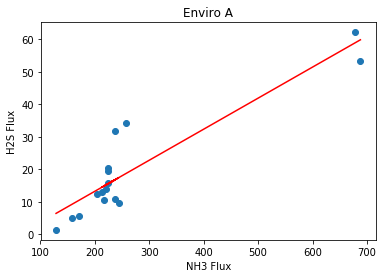

R squared value is 0.834
the coefficient: 0.096, and the intercept: -5.867


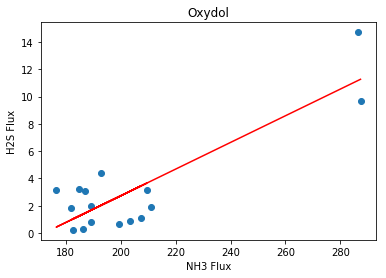

R squared value is 0.744
the coefficient: 0.098, and the intercept: -16.808


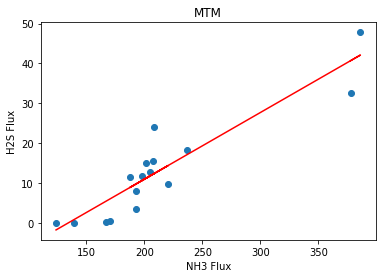

R squared value is 0.845
the coefficient: 0.167, and the intercept: -22.499


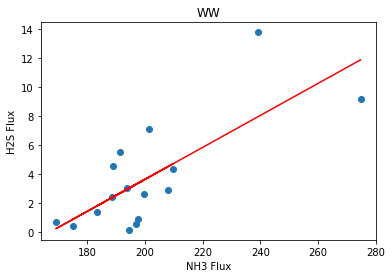

R squared value is 0.560
the coefficient: 0.110, and the intercept: -18.384


In [95]:
Nameoftreatment = ["Control", "Enviro A", "Oxydol", "MTM", "WW"]

for i in range(len(Nameoftreatment)):

    X = AverageNH3.loc[Nameoftreatment[i]].values.reshape(-1, 1)
    Y = AverageH2S.loc[Nameoftreatment[i]].values.reshape(-1, 1)
    
   
    model = LinearRegression()
    model.fit(X, Y)
    plt.scatter(X, Y)
    yfit = model.predict(X)
    
    plt.plot(X, yfit, color='red')
    plt.xlabel("NH3 Flux")
    plt.ylabel("H2S Flux")
    plt.title(Nameoftreatment[i])
    plt.show()
    print("R squared value is %1.3f" % (model.score(X,Y)))  
    
    print("the coefficient: %1.3f, and the intercept: %1.3f" % (model.coef_ , model.intercept_ ))